Task 11.1

In [18]:
import os
os.chdir(r'C:\Users\[editted]\OneDrive\Desktop\College\mining big data\data\MA_cbg_human_mobility_2020\MA_cbg_human_mobility_2020')
import pandas as pd
import numpy as np
import networkx as nx

df02 = pd.read_csv('MA_cbg2cbg_2020_02.csv')
average02 = sum(df02['visitor_count'])/len(df02['visitor_count'])
print("The average number of visitors in February is", average02)

df04 = pd.read_csv('MA_cbg2cbg_2020_04.csv')
average04 = sum(df04['visitor_count'])/len(df04['visitor_count'])
print("The average number of visitors in April is", average04)

The average number of visitors in February is 6.9313611634177414
The average number of visitors in April is 7.260037003736754


Interestingly, the average number of visitors in April is higher than average number of visitors in February, which is contrary to expectations due to covid. Perhaps there is an outlier in the data 

AxesSubplot(0.125,0.125;0.775x0.755)


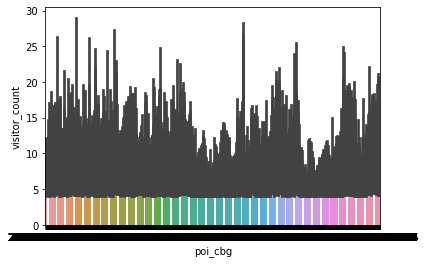

In [16]:
import seaborn as sns
#Computes a bar plot of total visitors in February
bar02 = sns.barplot(x='poi_cbg', y='visitor_count', data=df02)
print(bar02)

AxesSubplot(0.125,0.125;0.775x0.755)


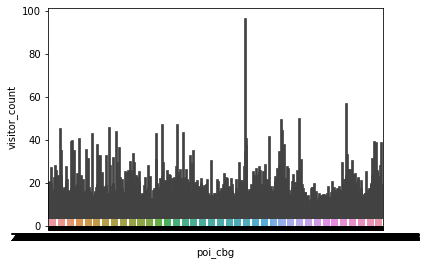

In [11]:
#Computes a barplot of total visitors in April
bar04 = sns.barplot(x='poi_cbg', y='visitor_count', data=df04)
print(bar04)

Comparing the two barplots, we can clearly see that in February, there were much more visitors than in April. 

AxesSubplot(0.125,0.125;0.775x0.755)


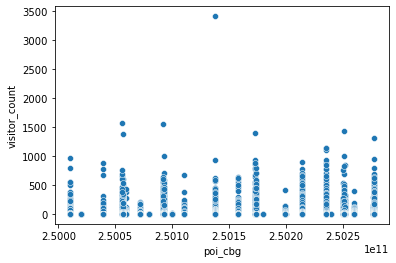

In [13]:
#Computes the scatter plot for number of visitors in February
scatter02 = sns.scatterplot(x='poi_cbg', y='visitor_count', data=df02)
print(scatter02)

AxesSubplot(0.125,0.125;0.775x0.755)


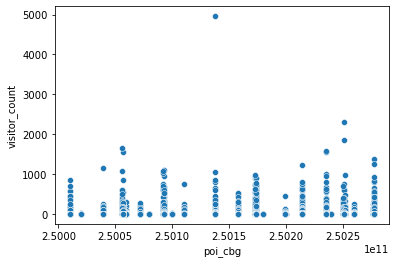

In [14]:
#Computes the scatterplot for number of visitors in April
scatter04 = sns.scatterplot(x='poi_cbg', y='visitor_count', data=df04)
print(scatter04)

Comparing the scatter plots of each month, we see an overall decrease in visitor counts from February to April. Meanwhile, there is an outlier in poi_cbg of 2.5015, which also explains why the barplot had a peak at that node. 

Task 11.2

In [4]:
# Creating the directed network mobility graph for data in February
G02 = nx.DiGraph()
for i in range(len(df02)):
    origin_cbg = df02.loc[i, 'poi_cbg']
    destination_cbg = df02.loc[i, 'visitor_census_tract']
    if str(origin_cbg)[:2] == '25' and str(destination_cbg)[:2] == '25':
        total_residents_in_origin = df02.loc[i, 'raw_device_counts']
        num_visitor = df02.loc[i, 'visitor_count']
        percent_visitor = num_visitor / total_residents_in_origin 
        G02.add_edge(origin_cbg, destination_cbg, weight=percent_visitor)

# Creating the directed network mobility graph for data in April
G04 = nx.DiGraph()
for i in range(len(df04)):
    origin_cbg = df04.loc[i, 'poi_cbg']
    destination_cbg = df04.loc[i, 'visitor_census_tract']
    if str(origin_cbg)[:2] == '25' and str(destination_cbg)[:2] == '25':
        total_residents_in_origin = df04.loc[i, 'raw_device_counts']
        num_visitor = df04.loc[i, 'visitor_count']
        percent_visitor = num_visitor / total_residents_in_origin 
        G04.add_edge(origin_cbg, destination_cbg, weight=percent_visitor)

In [5]:
#Calculating the average closeness centrality for February data
close02 = nx.closeness_centrality(G02)
avg_close02 = sum(close02.values())/len(close02)
print("The average closeness centrality of February mobility is", avg_close02)

#Calculating the average closeness centrality for April data
close04 = nx.closeness_centrality(G04, u = None, distance = None, wf_improved = True)
avg_close04 = sum(close04.values())/len(close04)
print("The average closeness centrality of April data is", avg_close04)

The average closeness centrality of February mobility is 0.43487011046882523
The average closeness centrality of April data is 0.3666685223493363


Comparing the average closenss centrality of the two months, the February average is clearly higher than the April average, which means that people were more closely connected within the network before the pandemic and the average distance between each node was shorter. 
This finding makes sense because after covid pandemic hit, people were forced to quarantine and to avoid contact with others, which decreased the connectedness of the network. 

In [10]:
#Calculates the average clustering coefficient of February data
cluster02 = nx.clustering(G02, nodes = None, weight = None)
avg_cluster02 = sum(cluster02.values())/len(cluster02)
print("The average cluster coefficient of February data is", avg_cluster02)

#Calculates the average clusternig coefficient of April Data
cluster04 = nx.clustering(G04, nodes = None, weight = None)
avg_cluster04 = sum(cluster04.values())/len(cluster04)
print("The average cluster coefficient of April data is", avg_cluster04)

The average cluster coefficient of February data is 0.2534210545393452
The average cluster coefficient of April data is 0.21561300394680086


Clustering coefficient is the degree in which nodes within a network are likely to cluster together. We can see that the average cluster coefficient for February is higher than the average cluster coefficient for April, which implies that people were more likely to cluster together before the pandemic. This makes sense becasue pandemic disabled people from physically meeting each other.

In [26]:
#Calculates the average betweenness centrality for February data
between02 = nx.betweenness_centrality(G02)
avg_between02 = sum(between02.values())/len(between02)
print("The average betweenness centrality of February mobility is", avg_between02)

The average betweenness centrality of February mobility is 0.0002618398425172745


In [12]:
#Calculates the average betweenness centrality for April data
between04 = nx.betweenness_centrality(G04)
avg_between04 = sum(between04.values())/len(between04)
print("The average betweenness centrality of April mobility is", avg_between04)

The average betweenness centrality of April mobility is 0.0003470182035623884
